# Big Data Infrastructure Projekt

### GitHub: https://github.com/wi22b085/big-data

## Zusammenhang zwischen positiven Covid19-Testungen und Impfungen

In diesem Big Data Infrastructure-Projekt geht es darum  die Anzahl der positiven Testungen sowie die Impfungen in Österreich bzw. in den jeweiligen Bundesländern/Gemeinden zu analysieren, zu visualisieren und miteinander in Zusammenhang zu setzen. 

In diesem Jupiter-Notebook werden alle relevanten Schritte (sowie Erklärungen dazu) dokumentiert.

## Neo4J

Neo4J ist eine NoSQL-Graph-Database. Sie wurde aus folgenden Gründen für dieses Projekt gewählt:

- Flexibilität
- ACID-Transaktionen werden unterstützt
- Daten sind eng miteinander verbunden
- Einfache Darstellung der Daten

BILD für letzten beiden punkte
BILD
BILD
BILD??????????

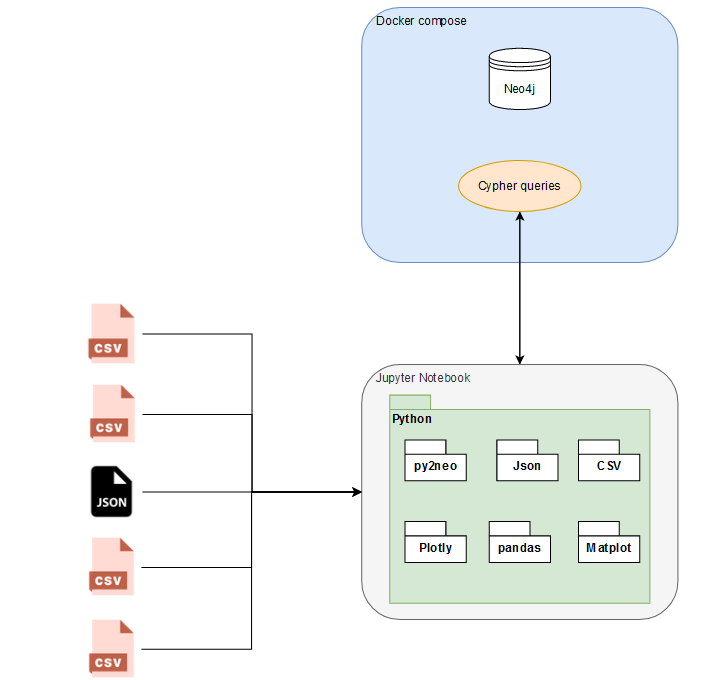

# Big Data Criteria

## 5 V's

### Volume:

- Fallen die Daten in großen Mengen an?

Es ist wichtig anzumerken, dass die Größe der Datenmenge relativ ist. Dennoch fallen in diesem Projekt eindeutig keine großen Datenmengen an. Daher ist dieser Punkt hier wenig Big-Data-relevant. Die Daten wurden zu Übungszwecken in der NoSQL-Graph-Database "Neo4J" gespeichert.

Alle genutzten Daten (4 CSV-Files) haben eine gemeinsame Größe von:
- ~ 13 000 Datensätzen
- ~ 900 KB

### Velocity:

- Fallen die Daten in einer großen Geschwindigkeit an?
- In welcher Geschwindigkeit werden die Daten verarbeitet?

Da in diesem Projekt keine neuen Daten anfallen und sie auch nur einmalig verarbeitet werden, ist Velocity hier wenig relevant.

Neo4J speichert die eigentlichen Daten auf der Festplatte. Jedoch lädt Neo4J Daten in den Arbeitsspeicher, um sie schneller verarbeiten zu können. In diesem Projekt wird nur Batch processing angewandt. Die Daten werden batchweise eingelesen, verarbeitet, in die Datenbank geladen und analysiert.

Lese-Zeit für ~ 900 KB:
- HDD: ~ 0,009 Sekunden bei 100 MB/s
- SSD: ~ 0,002 Sekunden bei 450 MB/s

Transfer-Zeit über Netzwertk für ~ 900 KB:
- ~ 0,009 Sekunden bei 100 MB/s

### Variety:

- Fallen die Daten in Großer Vielfalt an (Datentyp, Datenstruktur)?

Alle genutzten Daten dieses Projekts sind vom TYP CSV und strukturiert. Daher sind sie auch vollständig und folgen einem klaren Schema. Die Daten könnten daher auch in einer relationalen Datenbank mit Reihen und Spalten gespeichert werden.

### Veracity:

- Sind die daten von hoher Qualität (Glaubwürdigkeit, Gültigkeit, Wahrhaftigkeit)?

Alle Daten dieses Projekts stammen aus glaubwürdigen Quellen:
- https://info.gesundheitsministerium.at/
- https://www.data.gv.at/

Zusätzlich wurden die Daten auf Unstimmigkeiten (Ausreißer, Widersprüche, Fehlende Werte) geprüft. Hierfür wurde manuell vorgegangen und Python-Funktionen der Pandas-Library genutzt. Zusätzlich wurden die Ergebnisse mit anderen Quellen verglichen. Ein weiterer guter Indikator ist, dass die Impfzahlen für einen Ort nie kleiner sind als aus einem vorherigen Jahr. Aus diesen Gründen kann davon ausgegangen werden, dass die Daten von hoher Qualität sind.

### Value:

Die Analyse von Test- und Impfdaten kann wertvolle Einblicke liefern, um die Wirksamkeit verschiedener Strategien zu prüfen. Konnten Impfkampagnen in bestimmten Bundesländern bzw. in Österreich insagesamt zur Bekämpfung der Pandemie beitragen? Gibt es Dinge, die man in ähnlichen Situationen in der Zukunft besser machen kann. 

Zudem bietet die Art der Darstellung die Möglichkeit, große Datensätze vereinfacht darzustellen und so einerseits der Bevölkerung besser und ansehnlicher zu Verfügung zu stellen. Andererseits erleichtern visuelle Darstellungen aber auch die Dateninterpretation und befähigen, das Entdecken von Trends oder Anomalien und unterstützen strategische Entscheidungen der Zukunft. Daher kann die Verarbeitung und Aufbereitung von Daten bezüglich Impfungen und Infektionen im Zuge einer Pandemie aus Big Data Sicht einen großen Vorteil bieten.

Die genutzten Daten haben einen großen Mehrwert. Durch ihre Analyse wird ein möglicher Zusammenhang zwischen den positiven Covid19-Testungen und den Impfungen festgestellt.

## 4 Levels of Data Processing

### Data Sources (Data Source Layer):

Für dieses Projekt sind keine Tools zur Datengewinnung notwendig. Die Daten wurden einmalig aus Quellen des Internets lokal abgespeichert.

Daten:
- Typ: Strukturiert
- Velocity und Volume: Die Daten fallen einamlig in geringer Menge an
- Externe Datenquelle: https://info.gesundheitsministerium.at/ und https://www.data.gv.at/
- Daten-Typ: CSV

### Data Messaging and Store Layer (Data Storage Layer):

Die Daten wurden über Docker in der NoSQL-Graph-Database "Neo4J" gespeichert. Noch vorher werden die Daten geringfügig transformie
rt (Sonderzeichen entfernt). Daher wird der ETL (Extract, Transform, Load)-Ansatz verfolgt.

CAP:
- Consistency: Neo4J bietet ACID-Transaktionen
- Availability: Noe4J bietet Mechanismen für teilweisen Systemausfall
- Partition Tolerance: Wenig relevant, da die Datenbank nur auf einem System ist

### Analysis Layer (Processing Layer):

Die Daten wurden mit verschiedenen Pandas Funktionen analysiert. Zudem wurde eine MapReduce-Calculation durchgeführt. Hiefür wurde ausschließlich Python genutzt.

### Consumption Layer (Data Output Layer):

Die Ergebnisse der Analyse und deren Value wurden mithilfe von Visualisierungen dargestellt. Hierzu wurden die Python-Libraries "Matplotlib" und "Seaborn" verwendet. ??????????

Folgende Diagrammtypen wurden eingesetzt:
- Barplots
- Histogramme
- Kreisdiagramme
- Boxplots                    ???????????????
- Streudiagramme
- Choroplethenkarten

Es wurden außerdem die Datenbank-Visualisierungen von Neo4J genutzt.

Zielgruppe der Visualisierungen:
- Fachkolleg*innen

In diesem Projekt wurden teilweise Ergebnisse zurück in das System gespeist. Beispielsweise wurden Ergebnisse der MapReduce-Calculation abgespeichert, damit sie in einem weiteren Schritt zusammengefügt und zur Erstellung eines Diagramms genutzt werden konnten.

# Data Source and Storage

Zuerst wird ein Docker Container erstellt. Dieser enthällt einen Container, ein neo4j Image, auf welches durch die Ports 7474 und 7687 zugegriffen.Der Service ist durch ein Benutzername/Passwort-Paar ('neo4j/aveQho9yf6tx29vgW3kv') geschützt, das über Umgebungsvariablen konfiguriert ist.Es wird auch ein Volume erstellt womit man die Daten nicht erneut einlesen muss:

Dieses File wird dann gestartet:

In [64]:
!docker-compose -p project_neo4j up -d

 Network project_neo4j_default  Creating
 Network project_neo4j_default  Created
 Volume "project_neo4j_neo4j-data"  Creating
 Volume "project_neo4j_neo4j-data"  Created
 Container neo4j-container  Creating
 Container neo4j-container  Created
 Container neo4j-container  Starting
 Container neo4j-container  Started


Um Neo4j zu verwenden, müssen Sie es und seinen Python-Treiber installieren. Darüber hinaus erleichtert die Installation der Bibliothek py2neo die Verbindungen und Interaktionen mit der Neo4j-Datenbank.

In [65]:
pip install neo4j

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install py2neo

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install requests

In [68]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install nbformat>=4.20

Note: you may need to restart the kernel to use updated packages.


Die folgende Python-Version wurde genutzt:

In [71]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


Um die restlichen Komponenten aufzulisten wurde die Library "pkg_resouces" genutzt:

In [72]:
import pkg_resources
for d in pkg_resources.working_set:
    print(d.project_name, d.version)

Automat 20.2.0
Babel 2.11.0
Bottleneck 1.3.5
Flask 2.2.2
HeapDict 1.0.1
Jinja2 3.1.2
Markdown 3.4.1
MarkupSafe 2.1.1
Pillow 9.4.0
Protego 0.1.16
PyDispatcher 2.0.5
PyJWT 2.4.0
PyNaCl 1.5.0
PyQt5 5.15.7
PyQt5-sip 12.11.0
PyQtWebEngine 5.15.4
PySocks 1.7.1
PyWavelets 1.4.1
PyYAML 6.0
Pygments 2.15.1
QDarkStyle 3.0.2
QtAwesome 1.2.2
QtPy 2.2.0
Rtree 1.0.1
SQLAlchemy 1.4.39
Scrapy 2.8.0
Send2Trash 1.8.0
Sphinx 5.0.2
TBB 0.2
Twisted 22.10.0
Unidecode 1.2.0
Werkzeug 2.2.3
aiobotocore 2.5.0
aiofiles 22.1.0
aiohttp 3.8.5
aioitertools 0.7.1
aiosignal 1.2.0
aiosqlite 0.18.0
alabaster 0.7.12
anaconda-anon-usage 0.4.2
anaconda-catalogs 0.2.0
anaconda-client 1.12.1
anaconda-cloud-auth 0.1.3
anaconda-navigator 2.5.0
anaconda-project 0.11.1
anyio 3.5.0
appdirs 1.4.4
argon2-cffi 21.3.0
argon2-cffi-bindings 21.2.0
arrow 1.2.3
astroid 2.14.2
astropy 5.1
asttokens 2.0.5
async-timeout 4.0.2
atomicwrites 1.4.0
attrs 22.1.0
autopep8 1.6.0
backcall 0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile

Pandas, CSV, Requests und verschiedene Modules von Py2Neo werden importiert:

In [73]:
from py2neo import Graph, Node, Relationship
import csv
import pandas as pd
import requests

Die benötigten CSV-Dateien werden mithilfe von pdf.read_csv eingelesen.
Ingesamt gibt es vier CSV-Dateien. Drei davon enthalten Informationen über die Impfungen für die Jahre 2021, 2022 und 2023. Die vierte Datei gibt Information über die Testungen pro Bundesland in den Jahren 2021 bis Ende 2022.  

In [74]:
faelle = pd.read_csv('timeline-faelle-bundeslaender.csv',delimiter=';')
vaccines_2021_cumulated = pd.read_csv('impfungen_2021.csv',delimiter=';')
vaccines_2022_cumulated = pd.read_csv('impfungen_2022.csv',delimiter=';')
vaccines_2023_cumulated = pd.read_csv('impfungen_2023.csv',delimiter=';')

Im folgenden ein paar allgemeine Informationen über Struktur und Inhalt der CSV-Dateien.

Alle genutzten CSV-Files verfügen über folgende Metadaten:
- Spaltenüberschriften
- Dateiformat
- Dateiname
- Dateigröße
- Erstellungsdatum
- Letzte Änderungsdatum
- Semikolons als Trennzeichen

In [75]:
faelle.head()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen,Faelle
0,2021,1,Burgenland,638575,155435,483140,17797
1,2021,2,Kärnten,675557,217933,457624,18828
2,2021,3,Niederösterreich,3400756,1141984,2258772,94781
3,2021,4,Oberösterreich,2162517,546777,1615740,60271
4,2021,5,Salzburg,823353,274598,548755,22947


In [76]:
faelle.tail()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen,Faelle
6595,2022,6,Steiermark,22515339,6653515,15861824,627516
6596,2022,7,Tirol,10201158,4456324,5744834,284312
6597,2022,8,Vorarlberg,7295131,1652804,5642327,203320
6598,2022,9,Wien,73308019,65638829,7669190,2043138
6599,2022,10,Österreich,204039989,107516250,96523739,5686715


In [77]:
vaccines_2021_cumulated.head()

,Datum,Gemeindecode,Einwohner,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
0,2021,10101,14895,11666,78.321584,10961,73.588453
1,2021,10201,2000,1592,79.600000,1512,75.600000
2,2021,10301,1883,1506,79.978757,1444,76.686139
3,2021,10302,1841,1505,81.749049,1424,77.349267
4,2021,10303,2122,1672,78.793591,1591,74.976437


In [78]:
vaccines_2022_cumulated.head()

,date,municipality_id,municipality_name,municipality_population,dose_1,dose_2,dose_3,dose_4,dose_5+,vaccinated_according_to_recommendation,vaccinated_according_to_recommendation_percent
0,2022,10101,Eisenstadt,15485,12284,12037,9752,2169,18,9889,63.861802
1,2022,10201,Rust,2008,1644,1622,1356,261,4,1323,65.886454
2,2022,10301,Breitenbrunn am Neusiedler See,1922,1570,1552,1321,347,2,1340,69.719043
3,2022,10302,Donnerskirchen,1854,1552,1533,1298,281,0,1303,70.280475
4,2022,10303,Großhöflein,2099,1793,1759,1441,209,2,1465,69.795141


In [79]:
vaccines_2023_cumulated.head()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
0,2023,10101,Eisenstadt,15924,12095,11851,9740,3639
1,2023,10201,Rust,1978,1595,1572,1329,500
2,2023,10301,Breitenbrunn am Neusiedler See,1921,1517,1493,1285,569
3,2023,10302,Donnerskirchen,1857,1525,1505,1295,489
4,2023,10303,Großhöflein,2085,1739,1711,1411,433


In [80]:
vaccines_2021_cumulated.tail()

,Datum,Gemeindecode,Einwohner,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
2112,2021,91901,73861,55925,75.716549,52359,70.888561
2113,2021,92001,85264,57768,67.751923,53092,62.267780
2114,2021,92101,173916,126752,72.881161,116970,67.256607
2115,2021,92201,198806,149592,75.245214,138751,69.792159
2116,2021,92301,111812,84124,75.237005,78109,69.857439


In [81]:
vaccines_2022_cumulated.tail()

,date,municipality_id,municipality_name,municipality_population,dose_1,dose_2,dose_3,dose_4,dose_5+,vaccinated_according_to_recommendation,vaccinated_according_to_recommendation_percent
2110,2022,91901,Wien,75311,59229,57479,45842,11104,182,46412,61.627120
2111,2022,92001,Wien,84965,62179,59181,41511,7448,73,43494,51.190490
2112,2022,92101,Wien,181859,134331,129263,96569,18888,138,99984,54.978857
2113,2022,92201,Wien,208487,158431,153540,118550,21673,158,122136,58.582070
2114,2022,92301,Wien,116979,88831,85885,66592,14702,118,68510,58.566067


In [82]:
vaccines_2023_cumulated.tail()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
2110,2023,91901,Wien 19. Döbling,75538,56636,54886,44430,17876
2111,2023,92001,Wien 20. Brigittenau,86663,59122,56133,39894,12837
2112,2023,92101,Wien 21. Floridsdorf,185847,133412,128129,96106,32764
2113,2023,92201,Wien 22. Donaustadt,219026,161785,156582,121503,40595
2114,2023,92301,Wien 23. Liesing,120393,88895,85791,66808,25195


In [83]:
faelle.shape

(6600, 7)

In [84]:
vaccines_2021_cumulated.shape

(2117, 7)

In [85]:
vaccines_2022_cumulated.shape

(2115, 11)

In [86]:
vaccines_2023_cumulated.shape

(2115, 8)

Wie unten ersichtlich, besteht der Datensatz aus einem Datum, welches aus dem jahr besteht, der BundeslandID, dem Namen des jeweiligen Bundesland sowie der Anzahl der durchgeführten Coronatests. Diese werden dann wieder aufgeteilt in PCR- und Antigentests.Zuletzt werden auch noch die positiven Fälle angezeigt.

In [87]:
faelle.columns.tolist()

['Datum',
 'BundeslandID',
 'Name',
 'Testungen',
 'TestungenPCR',
 'TestungenAntigen',
 'Faelle']

Der Impfungsdatensatz besteht, wie durch die Form ersichtlich ist, aus 8 Spalten. Diese beinhalten, wie oben erwähnt, das Datum mit Uhrzeit, die ID des Bezirks (diese sind nach der ersten Zahl auch dem jeweiligen Bundesland zuordenbar), den Namen des Bezirks, die Bevölkerung und dann die Anzahl der Personen, die die jeweilige Impfungsanzahl erhalten haben.

In [88]:
vaccines_2022_cumulated.columns.tolist()

['date',
 'municipality_id',
 'municipality_name',
 'municipality_population',
 'dose_1',
 'dose_2',
 'dose_3',
 'dose_4',
 'dose_5+',
 'vaccinated_according_to_recommendation',
 'vaccinated_according_to_recommendation_percent']

Es wird noch überprüft, ob einige Datensätze unvollständig sind oder fehlende Werte aufweisen.

In [89]:
faelle.isnull().sum()

Datum               0
BundeslandID        0
Name                0
Testungen           0
TestungenPCR        0
TestungenAntigen    0
Faelle              0
dtype: int64

In [90]:
vaccines_2021_cumulated.isnull().sum()

Datum                     0
Gemeindecode              0
Einwohner                 0
Teilgeimpfte              0
TeilgeimpftePro100        0
Vollimmunisierte          0
VollimmunisiertePro100    0
dtype: int64

In [91]:
vaccines_2022_cumulated.isnull().sum()

date                                              0
municipality_id                                   0
municipality_name                                 0
municipality_population                           0
dose_1                                            0
dose_2                                            0
dose_3                                            0
dose_4                                            0
dose_5+                                           0
vaccinated_according_to_recommendation            0
vaccinated_according_to_recommendation_percent    0
dtype: int64

In [92]:
vaccines_2023_cumulated.isnull().sum()

date                       0
municipality_id            0
municipality_name          0
municipality_population    0
vaccination_1              0
vaccination_2              0
vaccination_3              0
vaccination_4+             0
dtype: int64

In diesem Fall sind alle Datensätze vollständig. 

Abschließend werden noch die allgemeinen Eigenschaften des Datensatzes angezeigt:

In [93]:
faelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Datum             6600 non-null   int64 
 1   BundeslandID      6600 non-null   int64 
 2   Name              6600 non-null   object
 3   Testungen         6600 non-null   int64 
 4   TestungenPCR      6600 non-null   int64 
 5   TestungenAntigen  6600 non-null   int64 
 6   Faelle            6600 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 361.1+ KB


* Es ist ein DataFrame.
* Es gibt 6600 Einträge, d.h. 6600 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 6599.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 6600 Werte sind non-null).
* Die Spalte Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~361.1 kb

In [94]:
vaccines_2023_cumulated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     2115 non-null   int64 
 1   municipality_id          2115 non-null   int64 
 2   municipality_name        2115 non-null   object
 3   municipality_population  2115 non-null   int64 
 4   vaccination_1            2115 non-null   int64 
 5   vaccination_2            2115 non-null   int64 
 6   vaccination_3            2115 non-null   int64 
 7   vaccination_4+           2115 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 132.3+ KB


* Es ist ein DataFrame.
* Es gibt 2115 Einträge, d.h. 2115 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 2114.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 2115 Werte sind non-null).
* Die Spalte Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~132.3 kb

In [95]:
#vaccines.info()

Um eine Verbindung zur Datenbank herzustellen, muss eine URL eingeben, über die die Verbindung hergestellt wird, sowie Authentifizierungsdaten, bestehend aus Benutzername und Passwort. Mit py2neo kann dann die Verbindung mithilfe von Graph hergestellt werden. Dies ist auch mit GraphDatabase von Neo4J möglich.

In [96]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"
password = "aveQho9yf6tx29vgW3kv"

graph = Graph(uri, auth=(username, password))
driver=GraphDatabase.driver(uri, auth=(username, password))


Um zu überprüfen, ob die Seite aktiv ist, kann diese Funktion verwendet werden:

In [97]:
url = "http://localhost:7474/browser/"
response = requests.get(url)

if response.status_code == 200:
    print("Website is accessible.")
else:
    print("Failed to access website.")



Website is accessible.


Im Folgenden werden die vier CSV-Dateien in die Datenbank eingespeichert.

Die Impfungen werden als Integer eingespeichert. Dadurch, dass in einigen Feldern Sonderzeichen enthalten sind, werden diese mit der Funktion stripped_row entfernt und der Datensatz korrekt übertragen.

In [98]:
with open('impfungen_2023.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['vaccination_1']),
                                    zweiteImpfung=int(stripped_row['vaccination_2']),
                                    dritteImpfung=int(stripped_row['vaccination_3']),
                                    mehrAls3=int(stripped_row['vaccination_4+']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [99]:
with open('impfungen_2021.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['Datum'],
                                    bezirkId=row['Gemeindecode'],
                                    population=row['Einwohner'],
                                    ersteImpfung=int(stripped_row['Teilgeimpfte']),
                                    zweiteImpfung=int(stripped_row['Vollimmunisierte']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [100]:
with open('impfungen_2022.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['dose_1']),
                                    zweiteImpfung=int(stripped_row['dose_2']),
                                    dritteImpfung=int(stripped_row['dose_3']),
                                    vierteImpfung=int(stripped_row['dose_4']),
                                    mehrAlsVier=int(stripped_row['dose_5+']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

Für einen ersten Überblick über die Anzahl an Impfungen:

In [101]:
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, sum(i.ersteImpfung) AS Vaccinations
"""

result = graph.run(cypher_query)

# Fetch all records
records = result.data()

# Print the result
for record in records:
    print(record)

{'Year': '2023', 'Vaccinations': 6531622}
{'Year': '2021', 'Vaccinations': 6395972}
{'Year': '2022', 'Vaccinations': 6725548}


Die Fälle werden ebenfalls mithilfe von stripped_row in die Datenbank eingespeichert, um falsche Zeichen zu vermeiden. Hier werden die Tests und auch die positiven Fälle als Integer dargestellt.

In [102]:
with open('timeline-faelle-bundeslaender.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            tests_value = stripped_row['Testungen']
            tests_value = int(tests_value) if tests_value.isdigit() else None
            # Create a Node for each row in the CSV file
            tests_node = Node("Tests",
                                datum=stripped_row['Datum'],
                                BundeslandID=row['BundeslandID'],
                                BundeslandName=row['Name'],
                                Tests=int(tests_value),
                                PCR=row['TestungenPCR'],
                                Antigen=row['TestungenAntigen'],
                                fällePositiv = int(stripped_row['Faelle'])
                               )
            
            # Add the Node to the graph
            graph.create(tests_node)

Für einen ersten Überblick über die Anzahl an positiven Fällen:

Zuletzt wurden dann noch die Kanten zwischen den Knoten erstellt. In diesem Fall wurden die Tests mit den Impfungen verbunden.

In [103]:
def create_relationships_with_limit(graph, node1_label, node2_label, relationship_type, limit):
    # Query that matches nodes, creates a limited number of relationships, and ensures no duplicate relationships
    query = f"""
    MATCH (n1:{node1_label}), (n2:{node2_label})
    WHERE n1.datum = n2.datum AND NOT EXISTS((n1)-[:{relationship_type}]->(n2))
    WITH n1, n2 LIMIT {limit}
    CREATE (n1)-[r:{relationship_type}]->(n2)
    RETURN count(r) as created_count
    """
    # Running the query
    result = graph.run(query).single().value()
    print(f"{result} relationships created")
    return result

In [127]:
query = f"""

MATCH (t:Tests), (i:Impf_Patient)
WHERE t.datum = i.datum
WITH t, i LIMIT 100000 
CREATE (t)-[r:SAME_TIME]->(i)
RETURN count(r)
"""
graph.run(query)

count(r)
100000


In [125]:
query = f""" MATCH (t:Tests)-[r:SAME_TIME]->(i:Impf_Patient)
RETURN t, r, i LIMIT 25
"""
graph.run(query)

t,r,i
"(_6382:Tests {Antigen: '1389673', BundeslandID: '6', BundeslandName: 'Steiermark', PCR: '509514', Tests: 1899187, datum: '2021', fällePositiv: 52931})",(_6382)-[:RELATIONSHIP_TYPE {}]->(_2115),"(_2115:Impf_Patient {bezirkId: '10101', datum: '2021', ersteImpfung: 11666, population: '14895', zweiteImpfung: 10961})"
"(_6376:Tests {Antigen: '10095398', BundeslandID: '10', BundeslandName: '\u00c3\u2013sterreich', PCR: '5507472', Tests: 15602870, datum: '2021', fällePositiv: 434861})",(_6376)-[:RELATIONSHIP_TYPE {}]->(_2115),"(_2115:Impf_Patient {bezirkId: '10101', datum: '2021', ersteImpfung: 11666, population: '14895', zweiteImpfung: 10961})"
"(_6356:Tests {Antigen: '9607679', BundeslandID: '10', BundeslandName: '\u00c3\u2013sterreich', PCR: '5395666', Tests: 15003345, datum: '2021', fällePositiv: 418152})",(_6356)-[:RELATIONSHIP_TYPE {}]->(_2115),"(_2115:Impf_Patient {bezirkId: '10101', datum: '2021', ersteImpfung: 11666, population: '14895', zweiteImpfung: 10961})"


# Visualizations

Um darzustellen, wie viele Tests insgesamt durchgeführt wurden, werden diese zunächst nach Bundesland dargestellt. Der Datensatz enthält ebenfalls die Gesamtzahlen aus ganz Österreich. Daher müssen diese Werte noch herausgefiltert werden. Wie oben bereits erwähnt, sind bestimmte Sonderzeichen im Datensatz vorhanden, daher muss auch Ã–sterreich aussortiert werden.

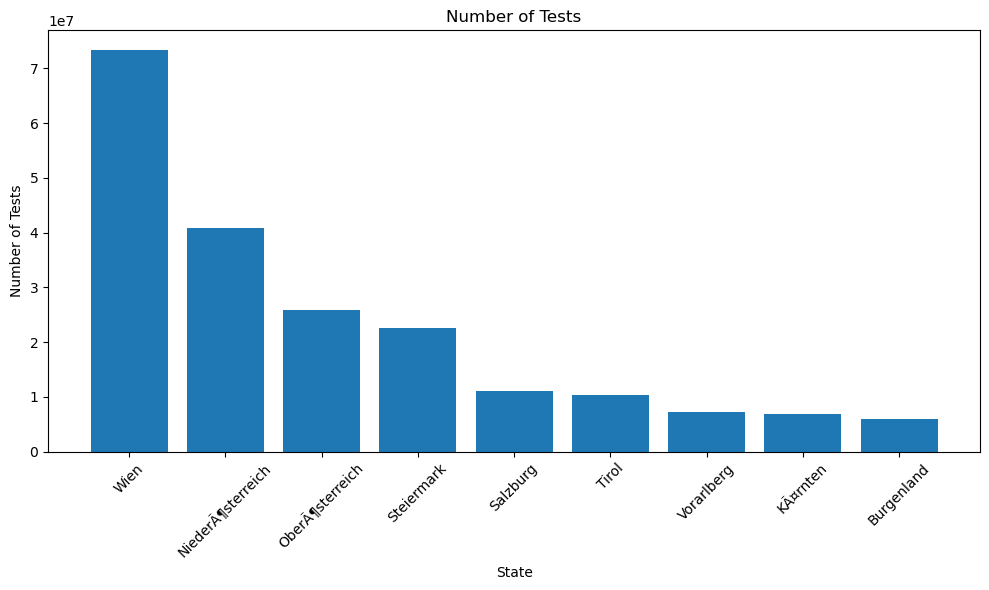

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
from neo4j import GraphDatabase
import numpy as np  # Import numpy for array operations

# Run Cypher query
result = graph.run("""
MATCH (t:Tests) 
where t.BundeslandName <> 'Österreich'AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, t.Tests
ORDER BY t.Tests DESC
""")

# Convert result to DataFrame
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# Replace None values with np.nan (NaN) or a default value
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.Tests'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Convert 't.Tests' column to numeric (in case it's not already)
df['t.Tests'] = pd.to_numeric(df['t.Tests'])

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.Tests'])
plt.xlabel('State')
plt.ylabel('Number of Tests')
plt.title('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


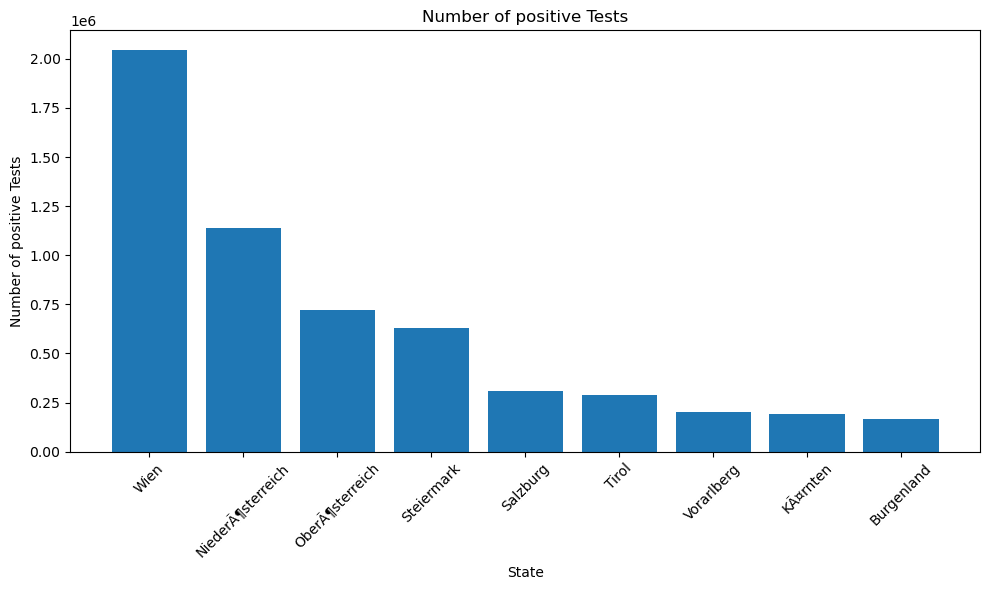

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
from neo4j import GraphDatabase
import numpy as np  # Import numpy for array operations

# Run Cypher query
result = graph.run("""
MATCH (t:Tests) 
where t.BundeslandName <> 'Österreich'AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, t.fällePositiv
ORDER BY t.fällePositiv DESC
""")

# Convert result to DataFrame
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# Replace None values with np.nan (NaN) or a default value
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.fällePositiv'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Convert 't.Tests' column to numeric (in case it's not already)
df['t.fällePositiv'] = pd.to_numeric(df['t.fällePositiv'])

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.fällePositiv'])
plt.xlabel('State')
plt.ylabel('Number of positive Tests')
plt.title('Number of positive Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


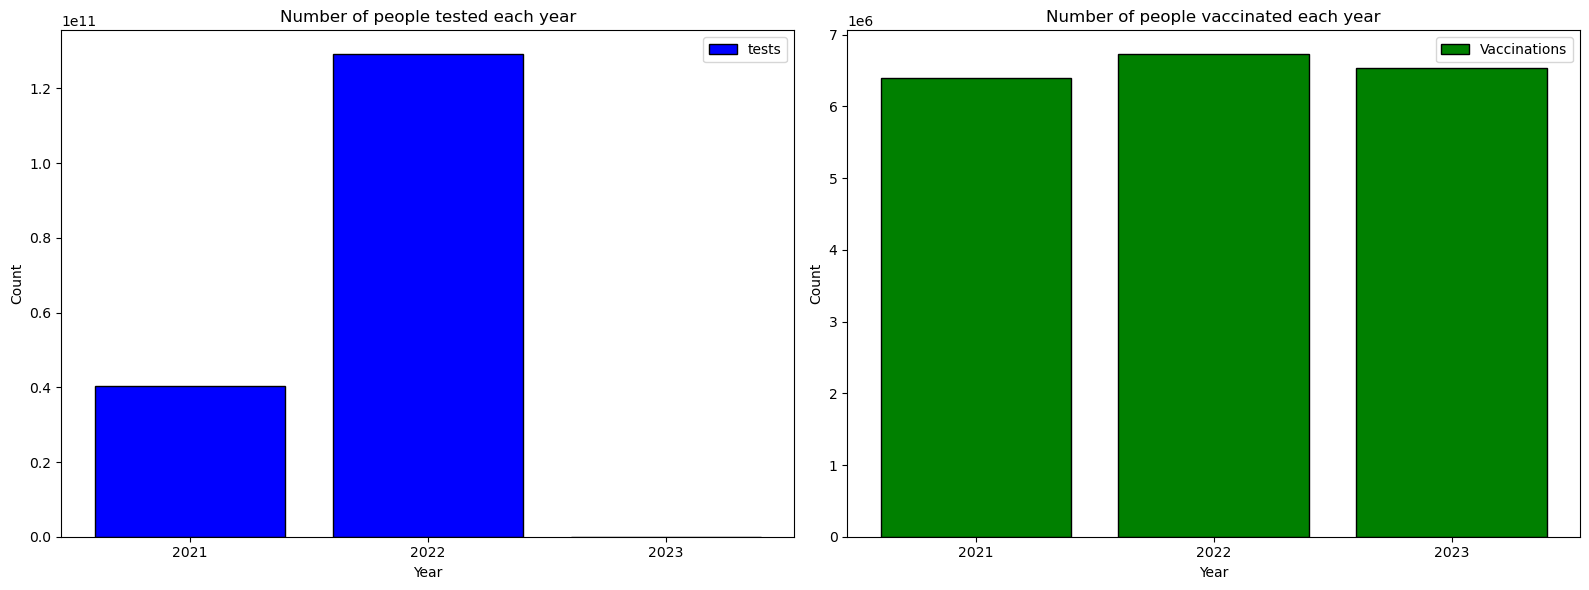

In [122]:
cypher_query = """
MATCH (n)
RETURN n.datum AS Year, sum(n.Tests) AS tests, sum(n.ersteImpfung) AS Vaccinations
ORDER BY Year
"""

with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Diagram for Tests
ax1.bar(df['Year'], df['tests'], color='b', edgecolor='black', label='tests')
ax1.set_xlabel("Year")
ax1.set_ylabel("Count")
ax1.set_title("Number of people tested each year")
ax1.set_xticks(df['Year'])
ax1.legend()

# Diagram for Vaccinations
ax2.bar(df['Year'], df['Vaccinations'], color='g', edgecolor='black', label='Vaccinations')
ax2.set_xlabel("Year")
ax2.set_ylabel("Count")
ax2.set_title("Number of people vaccinated each year")
ax2.set_xticks(df['Year'])
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

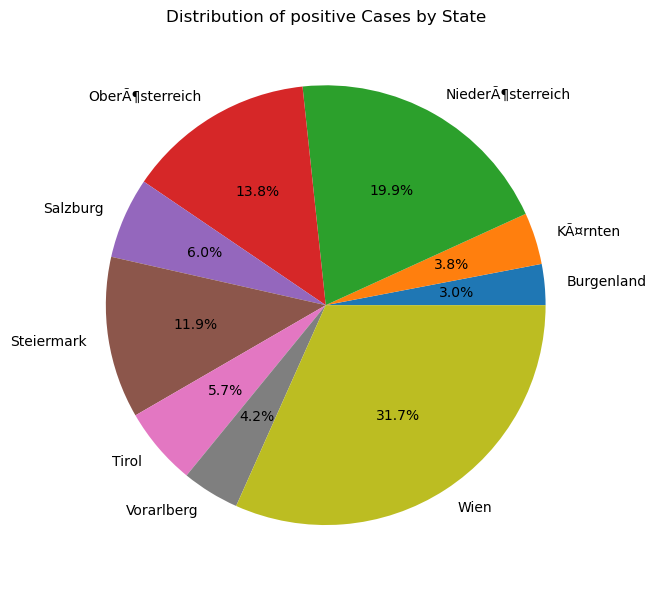

In [108]:
cypher_query = """
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, sum(t.fällePositiv) as Cases
"""

result = graph.run(cypher_query)

# Convert result to DataFrame
df = pd.DataFrame([dict(r) for r in result], columns=['t.BundeslandName', 'Cases'])

# Replace None values with 'Unknown' for BundeslandName and 0 for Tests
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['Cases'].replace({None: 0}, inplace=True)

# Convert 'Tests' column to numeric (in case it's not already)
df['Cases'] = pd.to_numeric(df['Cases'], errors='coerce')

# Remove rows with non-finite 'Tests' values
df = df[np.isfinite(df['Cases'])]

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['Cases'], labels=df['t.BundeslandName'], autopct='%1.1f%%')
plt.title('Distribution of positive Cases by State')
plt.tight_layout()
plt.show()



In [109]:
print(df.columns)

Index(['t.BundeslandName', 'Cases'], dtype='object')


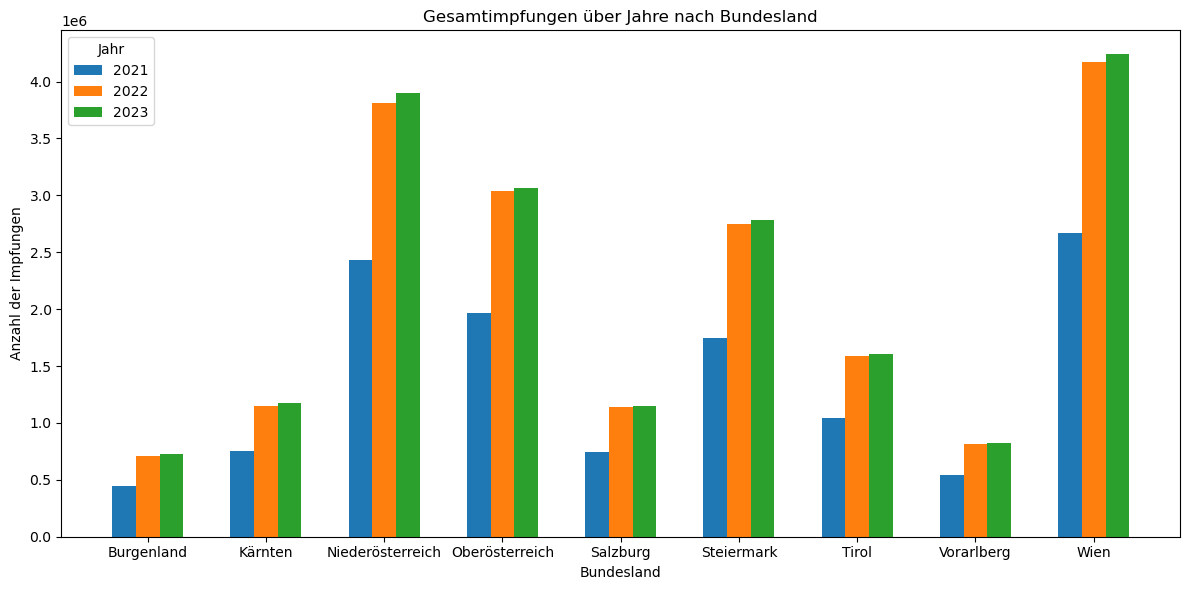

In [110]:
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, i.bezirkId AS opt,
       CASE WHEN i.datum CONTAINS '2021' THEN i.ersteImpfung + i.zweiteImpfung
            WHEN i.datum CONTAINS '2022' THEN i.ersteImpfung + i.zweiteImpfung + i.dritteImpfung + i.vierteImpfung + i.mehrAlsVier
            WHEN i.datum CONTAINS '2023' THEN i.ersteImpfung + i.zweiteImpfung + i.dritteImpfung + i.mehrAls3
       END as Vaccinations
"""


# Aus Datenbank abrufen
with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Bundesland von Bezirks-ID holen
df['bundesland'] = df['opt'].apply(lambda x: int(str(x)[0]))

# Pivotieren, damit Jahre als Spalten
df_pivot = df.pivot_table(index='bundesland', columns='Year', values='Vaccinations', aggfunc='sum')

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bar_width = 0.2
for i, year in enumerate(df_pivot.columns):
    x = df_pivot.index + i * bar_width  # x-Koordinaten-Balken
    ax.bar(x, df_pivot[year], width=bar_width, label=year, color=colors[i % len(colors)])

ax.set_title('Gesamtimpfungen über Jahre nach Bundesland')
ax.set_xlabel('Bundesland')
ax.set_ylabel('Anzahl der Impfungen')
ax.set_xticks(df_pivot.index + (len(df_pivot.columns) - 1) * bar_width / 2)
ax.set_xticklabels(['Burgenland', 'Kärnten', 'Niederösterreich', 'Oberösterreich',
                    'Salzburg', 'Steiermark', 'Tirol', 'Vorarlberg', 'Wien'])
ax.legend(title='Jahr')
plt.tight_layout()
plt.show()

In [111]:
import plotly.graph_objs as go
import pandas as pd
import json


austria_geojson_path = 'laender_999_geo.json'


with open(austria_geojson_path) as f:
    austria_geojson = json.load(f)


bundeslander = ['Wien', 'Niederoesterreich', 'Oberoesterreich', 'Steiermark', 'Kaernten', 
                'Salzburg', 'Tirol', 'Vorarlberg', 'Burgenland']


anzahl_befragte = [100, 200, 150, 250, 80, 90, 120, 60, 30]

austriamap = go.Choropleth(
    geojson=austria_geojson,  # Verweise auf die GeoJSON-Datei
    featureidkey="properties.name",  # Pfad zum Attribut im GeoJSON Feature, das den Namen des Bundeslandes enthält
    locations=bundeslander,  # Namen der Bundesländer aus deiner Liste
    z=anzahl_befragte,  # Numerische Werte, die du darstellen möchtest
    colorscale="Blues",
    reversescale=True,
    marker_line_width=0.5,
    colorbar_title="Anzahl der Befragten"
)

layout = go.Layout(
    title_text="Anzahl der Befragten in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    )
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()

In [112]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2021'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Reference to your GeoJSON file
    featureidkey="properties.iso",  # Path to the 'iso' property in the GeoJSON that matches 'bezirkId'
    locations=df['bezirkId'],  # Names of the regions (make sure these match the GeoJSON)
    z=df['TotalImpfungen'],  # Data to be mapped
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2021 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [113]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2022'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC
""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Reference to your GeoJSON file
    featureidkey="properties.iso",  # Path to the 'iso' property in the GeoJSON that matches 'bezirkId'
    locations=df['bezirkId'],  # Names of the regions (make sure these match the GeoJSON)
    z=df['TotalImpfungen'],  # Data to be mapped
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2022 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)


fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [114]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2023'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Reference to your GeoJSON file
    featureidkey="properties.iso",  # Path to the 'iso' property in the GeoJSON that matches 'bezirkId'
    locations=df['bezirkId'],  # Names of the regions (make sure these match the GeoJSON)
    z=df['TotalImpfungen'],  # Data to be mapped
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2023 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)


fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Ein allgemeiner Überblick über die positiven Fälle pro Bundesland:

In [115]:
Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")

for record in Test:
    print(record)

'1'	'Burgenland'	102272
'2'	'KÃ¤rnten'	157249
'3'	'NiederÃ¶sterreich'	601666
'4'	'OberÃ¶sterreich'	538549
'5'	'Salzburg'	241754
'6'	'Steiermark'	458497
'7'	'Tirol'	204157
'8'	'Vorarlberg'	156565
'9'	'Wien'	992677


In [116]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)


Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")

df = pd.DataFrame([dict(r) for r in Test], columns=['BundeslandID', 'TotalCases'])

austriamap = [go.Choropleth(
    geojson=austria_geojson,  
    featureidkey="properties.iso",  
    locations=df['BundeslandID'],  
    z=df['TotalCases'],  
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der positiven Fälle"
)]

layout = go.Layout(
    title_text="Anzahl der positiven Fälle in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()

Um abzufragen, wie viele Nodes in Der Tabelle sind, kann diese Query verwendet werden:

In [117]:
with driver.session() as session:
    result = session.run("MATCH (n) RETURN count(n) AS node_count")
    for record in result:
        print(record["node_count"])

12947


Im nächsten Abschnitt werden MapReduce-Calculations durchgeführt. Sie geben einen guten abschließenden, allgemeinen Überblick über die Impfdaten. Anschließend werden sie nochmals in einer Grafik dargestellt: 

### MapReduce-Calculations

Anzahl der Impfungen bis 2021:

In [118]:
csv_filename = 'impfungen_2021.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2021 = []

# CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['Gemeindecode'][0])  # Extract the first digit of Gemeindecode
        teilgeimpfte = int(row['Teilgeimpfte'])
        vollimmunisierte = int(row['Vollimmunisierte'])
        data_2021.append((bundesland_names[bundesland_id], teilgeimpfte + vollimmunisierte))  # Store the sum of teilgeimpfte and vollimmunisierte

# Reduce
result_2021 = {}

# Aggregieren pro Bundesland
for bundesland_name, summe in data_2021:
    if bundesland_name in result_2021:
        result_2021[bundesland_name] += summe
    else:
        result_2021[bundesland_name] = summe

# Output
for bundesland_name, summe in result_2021.items():
    print(f'{bundesland_name}: {summe}')

# Data saven
data_2021_save = result_2021.copy()


Burgenland: 448008
Kärnten: 752125
Niederösterreich: 2433662
Oberösterreich: 1963726
Salzburg: 745793
Steiermark: 1750087
Tirol: 1045723
Vorarlberg: 538266
Wien: 2664676


Anzahl der Impfungen bis 2022:

In [119]:
csv_filename = 'impfungen_2022.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2022 = []

# CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['municipality_id'][0])  # Extract the first digit of Gemeindecode
        dose1 = int(row['dose_1'])
        dose2 = int(row['dose_2'])
        dose3 = int(row['dose_3'])
        dose4 = int(row['dose_4'])
        dose5 = int(row['dose_5+'])
        data_2022.append((bundesland_names[bundesland_id], dose1 + dose2 + dose3 + dose4 + dose5))  # Store the sum of teilgeimpfte and vollimmunisierte

# Reduce
result_2022 = {}

# Aggregieren pro Bundesland
for bundesland_name, summe in data_2022:
    if bundesland_name in result_2022:
        result_2022[bundesland_name] += summe
    else:
        result_2022[bundesland_name] = summe

# Output
for bundesland_name, summe in result_2022.items():
    print(f'{bundesland_name}: {summe}')

# Data saven
data_2022_save = result_2022.copy()


Burgenland: 708464
Kärnten: 1151697
Niederösterreich: 3812335
Oberösterreich: 3036727
Salzburg: 1141794
Steiermark: 2751934
Tirol: 1592136
Vorarlberg: 816979
Wien: 4169957


Anzahl der Impfungen bis 2023:

In [120]:
csv_filename = 'impfungen_2023.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2023 = []

# CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['municipality_id'][0])  # Extract the first digit of Gemeindecode
        dose1 = int(row['vaccination_1'])
        dose2 = int(row['vaccination_2'])
        dose3 = int(row['vaccination_3'])
        dose4 = int(row['vaccination_4+'])
        
        data_2023.append((bundesland_names[bundesland_id], dose1 + dose2 + dose3 + dose4))  # Store the sum of teilgeimpfte and vollimmunisierte

# Reduce
result_2023 = {}

# Aggregieren pro Bundesland
for bundesland_name, summe in data_2023:
    if bundesland_name in result_2023:
        result_2023[bundesland_name] += summe
    else:
        result_2023[bundesland_name] = summe

# Output
for bundesland_name, summe in result_2023.items():
    print(f'{bundesland_name}: {summe}')

# Data saven
data_2023_save = result_2023.copy()


Burgenland: 725126
Kärnten: 1170762
Niederösterreich: 3896740
Oberösterreich: 3067711
Salzburg: 1148982
Steiermark: 2786608
Tirol: 1606019
Vorarlberg: 822758
Wien: 4237924


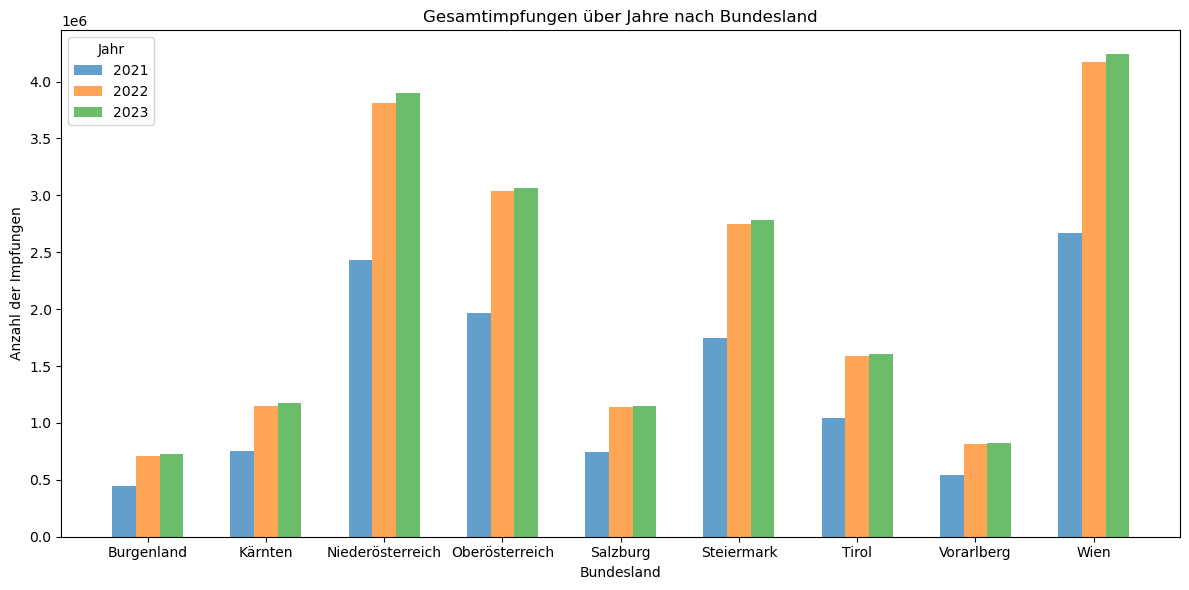

In [121]:
combined_data = {}

for bundesland_name in bundesland_names.values():
    combined_data[bundesland_name] = {
        '2021': data_2021_save.get(bundesland_name, 0),
        '2022': data_2022_save.get(bundesland_name, 0),
        '2023': data_2023_save.get(bundesland_name, 0)
    }

plt.figure(figsize=(12, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bar_width = 0.2

for j, year in enumerate(['2021', '2022', '2023']):
    x_values = []
    y_values = []
    for i, (bundesland, year_data) in enumerate(combined_data.items()):
        x_values.append(i + j * bar_width)
        y_values.append(year_data.get(year, 0))

    plt.bar(x_values, y_values, width=bar_width, color=colors[j], alpha=0.7, label=year)  # Add label for the legend

plt.title('Gesamtimpfungen über Jahre nach Bundesland')
plt.xlabel('Bundesland')
plt.ylabel('Anzahl der Impfungen')

# Add the legend. You need to do this with plt.legend() since you're using pyplot interface.
plt.legend(title='Jahr')

# Calculate the center position for x-ticks based on the number of bars
num_bars = len(['2021', '2022', '2023'])
plt.xticks(np.arange(len(combined_data)) + bar_width * (num_bars - 1) / 2, combined_data.keys())

plt.tight_layout()
plt.show()


#  Aufräumen:

Es werden alle container angezeigt

In [59]:
!docker ps

CONTAINER ID   IMAGE             COMMAND                  CREATED         STATUS         PORTS                                                      NAMES
d26d9bb99501   neo4j             "tini -g -- /startupâ€¦"   3 minutes ago   Up 3 minutes   0.0.0.0:7474->7474/tcp, 7473/tcp, 0.0.0.0:7687->7687/tcp   neo4j-container
da28a4451102   postgres:alpine   "docker-entrypoint.sâ€¦"   5 days ago      Up 3 minutes   0.0.0.0:5432->5432/tcp                                     springrest-db-1
cf8e78ee5190   mysql             "docker-entrypoint.sâ€¦"   5 weeks ago     Up 3 minutes   0.0.0.0:3306->3306/tcp, 33060/tcp                          mysql-docker-db-1


Danach wird der Container wieder geschlossen:

In [60]:
!docker-compose -p project_neo4j down

 Container neo4j-container  Stopping
 Container neo4j-container  Stopped
 Container neo4j-container  Removing
 Container neo4j-container  Removed
 Network project_neo4j_default  Removing
 Network project_neo4j_default  Removed


In [61]:
!docker volume ls

DRIVER    VOLUME NAME
local     01e437a5a8d8bc7e245b912d09d43424254839f9a5847bbca14ec50bedb2a39e
local     2a1e71ee1ce6f3beda88549d750b4dcbeb873168c1b6b3f3e1bdbda430c1e6d4
local     2da406f8db5b940380fb93f4966271a0b363a517b7e6b3be54320b6deedd534d
local     3_database-data
local     3aec2a74ba69962c495048de93320cbbc997f4b9af784058e6d88b50787fca0e
local     3b3cba9e74c6a871e7eeef09dfc218735c3c80bb62e0be6c1d74ae4ae1de5cf0
local     7b0139d75751cc6b816aa374c0f2dd9fdac9383d53805d43883757d2eb98b381
local     7d9498ec10cc26718ab37f95f2a204dd7ad2589e13b209033aae93f6f710cd75
local     07afa226328de34e67bc55e4a7b779876bdcdd8e1ba355e386ebbc6694c77807
local     08bcb7ca145378157cdb24b5d381f9d26ce32377bcadd234df8531f8aa185e8e
local     9e44016eecf6c763819c8d354b92d27a5cb35b22c3420876366a2aece87c62c6
local     9f315ccce15adb1ae202b5370383bb3f819fa2b94a2f6b7bd98da7a45ece960e
local     9f97846584768df214df7d0bbe7bfda209a5f858f56c92fe9fb62089fd013d83
local     14b26d1c731f78a55d9baf1d1dec6f5e27124e1a4f

Um ein Volume zu löschen, kann man wieder folgenden Befehl verwenden:

In [62]:
!docker volume rm project_neo4j_neo4j-data

project_neo4j_neo4j-data
